In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, load_img
import matplotlib.pyplot as plt
import string

In [2]:
train_df = pd.read_csv("H:\\Computer Science\\Nitte Stuff\\VI Sem\\Mini Project\\sign_mnist_train.csv", delimiter=',')
test_df = pd.read_csv("H:\\Computer Science\\Nitte Stuff\\VI Sem\\Mini Project\\sign_mnist_test.csv", delimiter=',')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
X_train, y_train = np.array(train_df.iloc[:, 1:]).reshape(-1, 28, 28).astype('float64'), np.array(train_df.label).astype('float64')
X_test, y_test = np.array(test_df.iloc[:, 1:]).reshape(-1, 28, 28).astype('float64'), np.array(test_df.label).astype('float64')
# Numpy -> Reshape
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(27455, 28, 28) (27455,)
(7172, 28, 28) (7172,)


In [4]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2)
# ImageGenerator -> Keras
train_generator = train_datagen.flow(x=np.expand_dims(X_train, axis=-1), y=y_train,
                  batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow(x=np.expand_dims(X_test, axis=-1), y=y_test,
                  batch_size=32) # Object instance

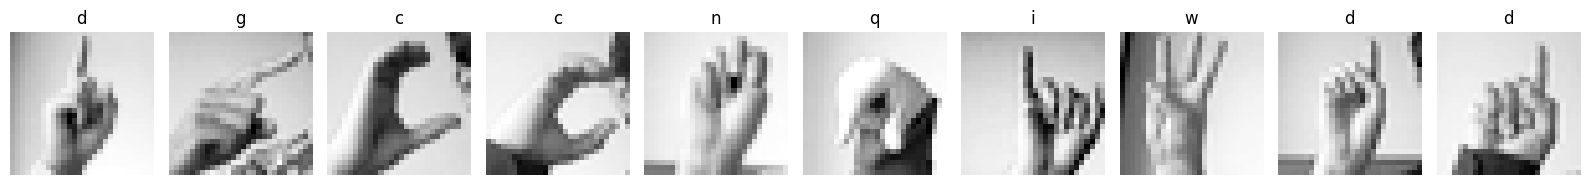

In [5]:
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()  #1-D Array
  letters = list(string.ascii_lowercase)

  for k in range(10):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img) #PIL to plot easily
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()


  plt.tight_layout()
  plt.show()

plot_categories(X_train, y_train)

In [6]:
from tensorflow.keras import Sequential #Linear Stack of layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout #Feature Extraction, downsample, Classification, prevent overfitting

tf.random.set_seed(1234)  #Random Seeds -> Same initial weights

model = tf.keras.Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),  #input and kernel
    MaxPooling2D(2, 2), #Reduce dimension - down sampling
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2), #reduces dimensionas and performs down-sampling
    Flatten(),   #Multidimensional to one dimension
    Dense(256, activation='relu'), # Rectified linear unit -> Learn complex patterns  (diff connections)
    Dropout(0.2),  #prevent Overfitting, interdependency and 0
    Dense(25, activation='softmax') #Raw scores in prob
])

model.compile(
    optimizer='adam',  #Optimization algo RMS
    loss='sparse_categorical_crossentropy', #Multiclass classification task penalizes incorrect more than correct
    metrics=['accuracy']
)

model.summary()


d:\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         6,425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,281 (844.85 KB)

 Trainable params: 216,281 (844.85 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15


d:\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.1652 - loss: 2.8149 - val_accuracy: 0.5809 - val_loss: 1.1956
Epoch 2/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.5348 - loss: 1.4529 - val_accuracy: 0.8260 - val_loss: 0.5738
Epoch 3/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.6803 - loss: 0.9678 - val_accuracy: 0.8833 - val_loss: 0.3629
Epoch 4/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.7495 - loss: 0.7524 - val_accuracy: 0.9168 - val_loss: 0.2477
Epoch 5/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 28s 32ms/step - accuracy: 0.7980 - loss: 0.6014 - val_accuracy: 0.9435 - val_loss: 0.1823
Epoch 6/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8290 - loss: 0.5084 - val_accuracy: 0.9699 - val_loss: 0.1230
Epoch 7/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.8536 - loss: 0.4429 - val_accuracy: 0.9667 - val_loss: 0.1120
Epoch 8/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.8696 - loss: 0.3923 - val_accurac

In [9]:
model.save("sign-lang.h5")


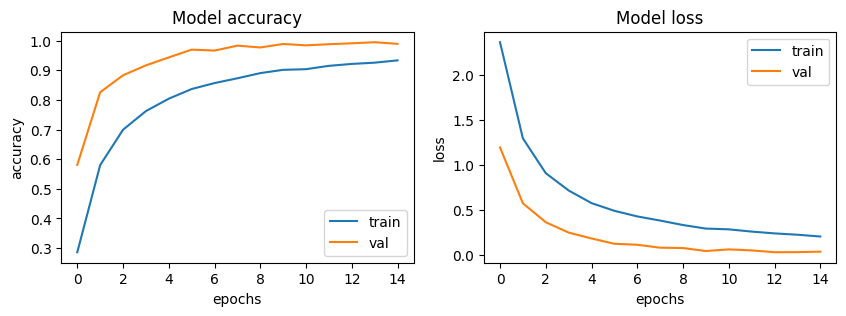

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])